# Data as N-Dimensional Points
So far, we have seen data as a collection of observations of multiple variables. We often represented a dataset as a table or a data matrix. In all previous analyses, we have focused on the interpretation of the values of each variable.

However, in many cases (and especially when variables are many), it is useful to given a geometric interpretation of data and see observations as **d-dimensional data points**, where $d$ is the number of variables in the dataset. Consider the following data:

|Subject|Height (cm)|Weight (Kg)|
|-|-|-|
|1|175|70|
|2|160|60|
|3|180|78|
|4|160|75|
|5|155|58|
|6|190|110|

We can see each of these observations (the rows of the matrix) as a data point. Further, we can geometrically represent such points as follows:

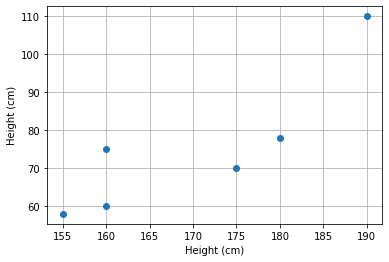

In [1]:
from matplotlib import pyplot as plt
plt.plot([175,160,180,160,155,190], [70,60,78,75,58,110],'o')
plt.grid()
plt.xlabel('Height (cm)')
plt.ylabel('Height (cm)')
plt.show()

Each observation, is a 2D point in the Cartesian space. This geometrical interpretation of data is central to data analysis and very convenient in particular **when many different variables are available**. 

## Features and Representation Functions
In this context in which we are not always **explicitly giving names or interpretation to the variables**, each of the variables will also be referred to as **a feature of the data**. For instance, **a dataset of images of $100 \times 100$ pixels can be seen as a collection of $10000$-dimensional vectors**, where each vector's dimension is a "feature", i.e., the value of a specific pixel of the image.

Given this interpretation of variables as features, it is often common to talk about **feature extraction**, in the case of any process transforming the data $\mathbf{x} \in \Re^d$ to another form $\mathbf{y} \in \Re^m$. In this context, a function:

$$f : \Re^d \to \Re^m$$

will be often referred to as a "**feature extraction function**" (of feature extractor) or a "**representation function**". We will recall these terms going further in the course. We will also refer to the process of mapping data using a representation function as **data representation**.

We will also refer to $\Re^d$ and $\Re^m$ as "**feature spaces**" or "**representation spaces**" as they will be **vector spaces** to which data points (also called **feature vectors**) belong.

Data representation can help making data analysis processes simpler. Consider for example the example below:

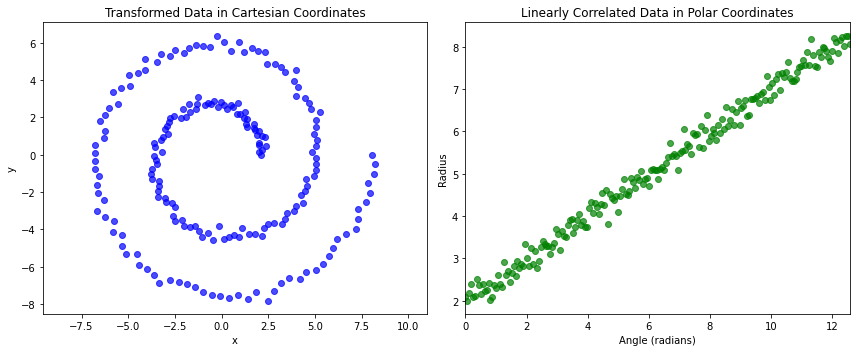

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate linearly correlated data in Polar coordinates
np.random.seed(42)
n_samples = 200

# Generate linearly spaced angles (theta) from 0 to 4π
theta = np.linspace(0, 4 * np.pi, n_samples)  # Increasing angle for a spiral effect

# Define a linear relationship for radius: r = m * theta + c
m = 0.5  # Slope
c = 2    # Intercept
radius = m * theta + c + np.random.normal(0, 0.2, n_samples)  # Add small noise

# Step 2: Convert Polar to Cartesian coordinates
x = radius * np.cos(theta)
y = radius * np.sin(theta)

# Step 3: Plot both Polar and Cartesian representations
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Polar plot: plot radius vs. angle (in radians)
ax[1].scatter(theta, radius, c='green', alpha=0.7)
ax[1].set_title("Linearly Correlated Data in Polar Coordinates")
ax[1].set_xlabel("Angle (radians)")
ax[1].set_ylabel("Radius")
ax[1].set_xlim(0, 4 * np.pi)

# Cartesian plot
ax[0].scatter(x, y, c='blue', alpha=0.7)
ax[0].set_title("Transformed Data in Cartesian Coordinates")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].axis('equal')

plt.tight_layout()
plt.show()


The data on the left follows a non-linear pattern which we wouldn't know how to correctly model. However, taking polar coordinates in this form (in practice the case-defined `atan2` function is used instead of `arctan` to handle quadrants correctly):

$$r = \sqrt{x^2 + y^2} $$
$$\theta = \arctan\left(\frac{y}{x}\right)$$

We obtain a linear set of data which could be modeled with a linear regression.

## Important Properties of Feature Spaces
Since observations $\mathbf{x}$ are vectors living in some vector spaces, all **basic properties of vectors and vector spaces seen in linear algebra will apply here as well**. We'll recall the most important concepts as we need them in the course, but, for the moment, it is useful to summarize the main important properties.

### Norms
Given a vector space $S$, a norm $p$ is a function from $S$ to a non negative real number:

$$p \in S \to \Re^+_0$$

A commonly used family of norms is the one of the L-p norms:

$$||\mathbf{x}||_p = \left( \sum_{i=1}^{d} |x_i|^p \right)^{1/p}$$

Where $\mathbf{x}$ is d-dimensional, $x_i$ is the i-th component of $\mathbf{x}$, and $p$ is a parameter defining the behavior of the norm.

Note that a norm computes some kind of measure of distance of the vector from the origin of the space. In practice, the following norms are commonly used:

**L-2 Norm**

$$||\mathbf{x}||_2 = \sqrt{\sum_{i=1}^{d} x_i^2}$$

This is what we know as "computing the magnitude (or modulus) of the vector". It is the Euclidean distance between the origin and the vector.

When we use the L2 norm, we can omit the $p=2$ subscript:

$$||\mathbf{x}||_2 = ||\mathbf{x}||$$

Another commonly used notation is the one for the squared L2 norm:

$$||\mathbf{x}||_2^2 = ||\mathbf{x}||^2 = \sum_{i=1}^{d} x_i^2$$

**L-1 Norm**

$$||\mathbf{x}||_1 = \sum_{i=1}^{d} |x_i|$$

This is the sum of the absolute values of the components of the vector.

**L-$\infty$ Norm**

$$||\mathbf{x}||_\infty = \max\{|x_i|\}_{i=1}^{d}$$

This is the maximum absolute value of the components of the vector.

To visualize the difference between the different norms, it often common to display the **unit circles according to the different norms**. Each of the shapes is made of **vectors with unit norm** according to specific norm:

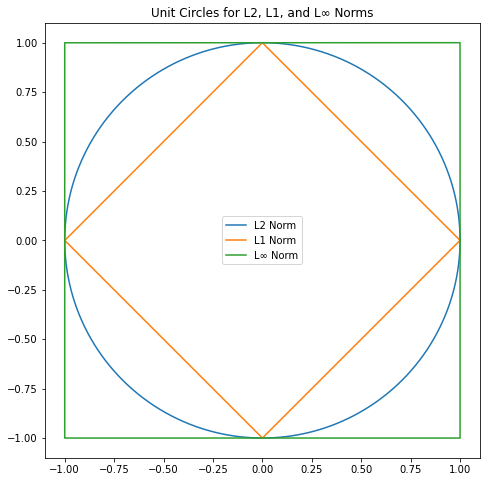

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of angles
theta = np.linspace(0, 2*np.pi, 10000)

# Unit circles for L2, L1, and L∞ norms
l2_circle = np.array([np.cos(theta), np.sin(theta)])
l1_circle = np.array([np.cos(theta), np.sin(theta)])
linf_circle = np.array([np.cos(theta), np.sin(theta)])

# Normalize vectors for L1 and L∞ norms
l1_circle /= np.sum(np.abs(l1_circle), axis=0)
l2_circle /= np.sum((l2_circle)**2, axis=0)
linf_circle /= np.max(np.abs(linf_circle), axis=0)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the unit circles for L2, L1, and L∞ norms
ax.plot(l2_circle[0], l2_circle[1], label='L2 Norm')
ax.plot(l1_circle[0], l1_circle[1], label='L1 Norm')
ax.plot(linf_circle[0], linf_circle[1], label='L∞ Norm')

# Set equal aspect ratio
ax.set_aspect('equal', adjustable='box')

# Set labels and legend
ax.set_title('Unit Circles for L2, L1, and L∞ Norms')
ax.legend()

# Display the plot
plt.show()


### Metrics
Given a space $S$, a function

$m : S \times S \to \Re$

is **a metric** if the following properties are satisfied:

1. The distance of a point from itself is zero: $m(\mathbf{x}, \mathbf{x}) = 0$;
2. The distance between two distinct points is always positive (positivity) if $\mathbf{x} \neq \mathbf{y}$: $m(\mathbf{x},\mathbf{y}) \geq 0, \forall \mathbf{x}, \mathbf{y} \in S, \mathbf{x} \neq \mathbf{y}$;
3. The distance between $x$ and $y$ is the same as the distance between $y$ and $x$ (symmetry): $m(\mathbf{x}, \mathbf{y}) = m(\mathbf{y}, \mathbf{x})$.
4. Triangle inequality: $m(\mathbf{x},\mathbf{y}) \leq m(\mathbf{x},\mathbf{z}) + m(\mathbf{z},\mathbf{y}), \forall \mathbf{x}, \mathbf{y}, \mathbf{z} \in S$

#### L-p Metrics
From the L-p norms, we can derive **a family of metrics** as follows:

$$L_p(\mathbf{x},\mathbf{y}) = ||\mathbf{x} - \mathbf{y}||_p = \left( \sum_{i=1}^{d} |x_i - y_i|^p \right)^{1/p}$$ 

**L2 Distance**

Note that with $p=2$ we have the Euclidean (or L-2) distance:

$$L_2(\mathbf{x},\mathbf{y}) = ||\mathbf{x} - \mathbf{y}||_2 = \sqrt{\sum_{i=1}^{d} (x_i - y_i)^2}$$ 

**L1 Distance**

With $p=1$, we obtain the L1 distance, which is also known as the **Manhattan distance**:

$$L_1(\mathbf{x},\mathbf{y}) = ||\mathbf{x} - \mathbf{y}||_1 = \sum_{i=1}^{d} |x_i - y_i|$$ 

**L-$\infty$ Distance**

With $p=\inf$, we obtain the L-$\infty$ distance:

$$L_\infty(\mathbf{x},\mathbf{y}) = ||\mathbf{x} - \mathbf{y}||_\infty = \max_{i=1}^d\{|x_i - y_i|\}$$ 

The difference between the L1 and L2 distances is notable, as shown in the figure blow:

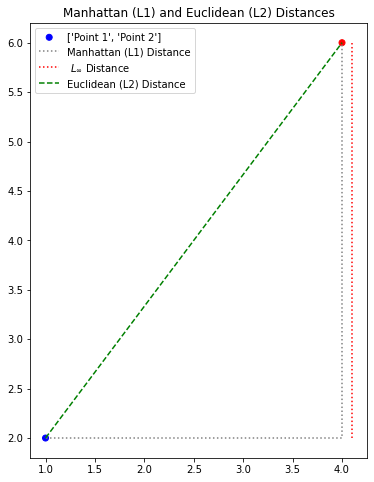

Manhattan (L1) Distance: 7.00
Euclidean (L2) Distance: 5.00
L-Inf Distance: 4.00


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define two points in 2D space
point1 = np.array([1, 2])
point2 = np.array([4, 6])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the points
ax.scatter([point1[0], point2[0]], [point1[1], point2[1]], c=['blue', 'red'], label=['Point 1', 'Point 2'])

# Connect the points with zig-zag lines for Manhattan (L1) distance
ax.plot([point1[0], point2[0], point2[0]], [point1[1], point1[1], point2[1]], linestyle='dotted', color='gray', label='Manhattan (L1) Distance')

# Connect the points with L-inf distance
ax.plot([point2[0]+0.1, point2[0]+0.1], [point1[1], point2[1]], linestyle='dotted', color='red', label=' $L_{\\infty}$ Distance')

# Calculate Manhattan (L1) distance
manhattan_distance = np.sum(np.abs(point2 - point1))

inf_distance = np.max(np.abs(point2-point1))

# Plot the diagonal (Euclidean distance)
ax.plot([point1[0], point2[0]], [point1[1], point2[1]], linestyle='dashed', color='green', label='Euclidean (L2) Distance')

# Calculate Euclidean (L2) distance
euclidean_distance = np.linalg.norm(point2 - point1)

# Set equal aspect ratio
ax.set_aspect('equal', adjustable='box')

# Set labels and legend
ax.set_title('Manhattan (L1) and Euclidean (L2) Distances')
ax.legend()

# Display the plot
plt.show()

print(f"Manhattan (L1) Distance: {manhattan_distance:.2f}")
print(f"Euclidean (L2) Distance: {euclidean_distance:.2f}")
print(f"L-Inf Distance: {inf_distance:.2f}")


While the Euclidean distance measures the length of the straight segment connecting the two points, the Manhattan distance is the one in grey (dashed), which measures the distance that a taxi driver should drive in Manhattan (or any other square-block based city) to reach the destination.

#### Cosine Distance
The cosine distance is useful when we need to compare two vectors but we do not care about differences arising from scaling factors. Note that the Euclidean distance of two proportional vectors is in general non-zero:

$$||\mathbf{x} - \alpha \mathbf{x}||^2 > 0, \alpha \neq 1$$

Nevertheless, $\mathbf{x}$ and $\alpha \mathbf{x}$ are very similar. If we want to compare two vectors considering only **the relationships between their coordinates, rather than their values**, we can use the cosine similarity, which is defined as follows:

$$S_C (\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}|| ||\mathbf{y}||}$$

The cosine similarity computes the cosine of the angle $\theta$ comprised between two vectors, as shown in the plot below:

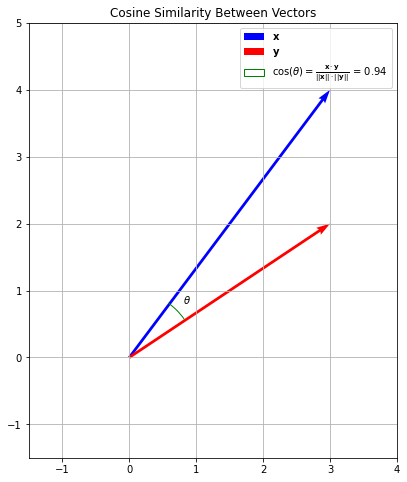

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Define two vectors
vector1 = np.array([3, 4])
vector2 = np.array([3, 2])

# Calculate cosine similarity
cosine_similarity = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the vectors
ax.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='$\\mathbf{x}$')
ax.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='red', label='$\\mathbf{y}$')

# Set the aspect ratio of the plot to be equal
ax.set_aspect('equal', adjustable='box')

# Plot the angle between vectors
angle = np.degrees(np.arccos(cosine_similarity))
arc = Arc((0, 0), 2, 2, angle=angle*1.8, theta1=0, theta2=angle, color='green', label='$\\cos(\\theta) = \\frac{\\mathbf{x} \cdot \\mathbf{y}}{||\\mathbf{x}||\cdot ||\\mathbf{y}||}$ = '+f"{cosine_similarity:0.2f}")
ax.add_patch(arc)
ax.text(0.8,0.8,"$\\theta$")

# Set limits
ax.set_xlim([-1.5, 4])
ax.set_ylim([-1.5, 5])

# Set labels and legend
ax.set_title('Cosine Similarity Between Vectors')
plt.grid()
ax.legend()

# Display the plot
plt.show()


Note that the cosine similarity would be the same if the two vectors had different scales (i.e., if they were longer but they would have the same orientation).

This kind of similarity measure is useful when the scale of the vector is not important. For instance, if the vectors $\mathbf{x}$ and $\mathbf{y}$ are vectors of word counts of two documents of different lengths, we care about the **proportions of words in each document, while longer document will have vectors with larger L2 norms**.

The cosine similarity is a normalized number between $-1$ and $1$, where:

* $+1$ means maximum alignment (similarity) between the two vectors;
* $-1$ means that the two vectors are dissimilar - they are indeed opposite.
* $0$ means that the two vectors are orthogonal.

The plot below shows different examples of cosine similarity of vector pairs:

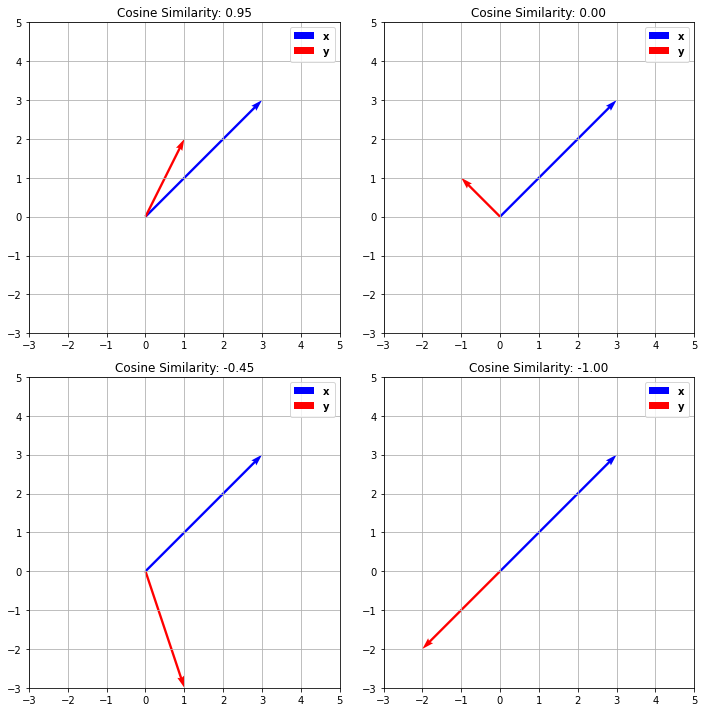

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define two vectors
vector1 = np.array([3, 3])
vectors2 = [np.array([1, 2]), np.array([-1, 1]), np.array([1, -3]), np.array([-2, -2])]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through vectors2 and plot each subplot
for i, vector2 in enumerate(vectors2):
    # Calculate cosine similarity
    cosine_similarity = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

    # Plot the vectors
    axes[i].quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='$\\mathbf{x}$')
    axes[i].quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='red', label='$\\mathbf{y}$')

    # Set the aspect ratio of the plot to be equal
    axes[i].set_aspect('equal', adjustable='box')

    # Set labels and legend
    axes[i].set_title(f'Cosine Similarity: {cosine_similarity:.2f}')
    axes[i].legend()
    axes[i].grid()

# Set limits for all subplots
for ax in axes:
    ax.set_xlim([-3, 5])
    ax.set_ylim([-3, 5])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


The cosine distance is defined from the cosine similarity as:

$$D_C = 1- S_C = 1- \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}|| \cdot ||\mathbf{x}||}$$

It should be noted that the cosine similarity is not a metric as it does not satisfy the triangular inequality. 

## References
 - https://en.wikipedia.org/wiki/Norm_(mathematics)
 - https://en.wikipedia.org/wiki/Lp_space
 - https://en.wikipedia.org/wiki/Metric_space
 - https://en.wikipedia.org/wiki/Cosine_similarity
 - Parts of Chapter 2 of \[1\]

\[1\] Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. Deep learning. MIT press, 2016.